# General Usage

## Step 1 - Imports

In [26]:
import synther
from mysynthermods import displaywave
from IPython.display import Audio

## Step 2 - Generate a new project

In [27]:
proj = synther.gen_project()

## Step 3 - Create an execution plan for the waveform

We take a memory buffer, and modify it to produce a waveform. It turns out that if we simply add the same frequency over and over again, we get a harmonic series, which sounds pretty cool!

In [28]:
def generate_waveform(project, buffer):
    base_frequency_hz = 110.0
    num_notes = 20
    note_spacing_ms = 200
    attack_ms = 90
    sustain_ms = 20
    decay_ms = 90
    amp = 32760 / 4
    wave_type = synther.WaveType.SINE
    for i in range(num_notes):
        freq_hz = base_frequency_hz + i * base_frequency_hz
        project.queue_produce_wave(buffer, i * note_spacing_ms, attack_ms, sustain_ms, decay_ms, freq_hz, amp / 2, wave_type)
    # play the fundamental at the same time
    project.queue_produce_wave(buffer, 0, attack_ms, num_notes * note_spacing_ms + sustain_ms, decay_ms, base_frequency_hz, amp, wave_type)

## Step 4 - Create an execution plan for rendering the waveform to a .wav file

OK, it's probably time we talk about the synther build system. The following will queue a render command (to write the .wav file), but it may not actually get invoked. That's because it's an incremental build system. This means, the build system saves you time by avoiding a rewrite of the .wav file if the commands that came before the render are the exact same as the last time it was built. Synther will walk the dependency tree, and make sure it builds when appropriate.

In [29]:
def render_waveform(project, buffer):
    project.queue_dump_buffer(buffer, 'example_usage_output.wav')

## Step 5 - Queue up the previous execution plans

Once we ask the project to generate a buffer for us, we can then queue further commands while referencing that buffer (using the execution plans we created earlier). 

In [30]:
buffer = proj.queue_gen_buffer()

generate_waveform(proj, buffer)
render_waveform(proj, buffer)

### Step 6 - Build it

I know it's hard to believe, but so far we've hardly done anything. We've just made a list of the things we want Synther to do. Synther will take it from here, and decide if it's actually going to do those things based on the files that are already on disk. It will do nothing unless it's your first run ever, or if you've modified the previous steps.

In [31]:
proj.build()

Starting build.
Rendering "example_usage_output.wav".
Build finished.


### Step 7 - Play it

The build step ensures we have a .wav file. So let's hear it!

In [32]:
Audio('./example_usage_output.wav', autoplay=False)

### Step 8 - Let's see it!

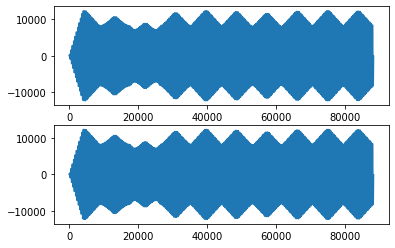

In [33]:
displaywave.display_partial_file('example_usage_output.wav', 0, 2000)